In [1]:
#Importing all Librarires
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
import re
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from PIL import Image
import nltk
from nltk.stem import WordNetLemmatizer 

//anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)

Bad key "text.kerning_factor" on line 4 in
//anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar',

In [2]:
#Reading the travel search data
travel_search = pd.read_csv("travel_searches.csv")

In [3]:
#Structure of the travel search data
travel_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368569 entries, 0 to 368568
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   query            368569 non-null  object 
 1   clickthroughurl  368569 non-null  object 
 2   os               368569 non-null  object 
 3   device           368569 non-null  object 
 4   date             368569 non-null  int64  
 5   age              341451 non-null  float64
 6   gender           334122 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 19.7+ MB


In [4]:
##Dispaying Information of first few Travel Search
travel_search.describe(include =object)

,query,clickthroughurl,os,device,gender
count,368569,368569,368569,368569,334122
unique,90082,143077,10,272,2
top,tui_holidays,www.tui.co.uk,windows nt,Desktop Browser,Male
freq,17073,6541,227615,293301,187313


In [5]:
#Converting type of date into right format
travel_search["date"] = pd.to_datetime(travel_search["date"], format='%Y%m%d')
travel_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368569 entries, 0 to 368568
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   query            368569 non-null  object        
 1   clickthroughurl  368569 non-null  object        
 2   os               368569 non-null  object        
 3   device           368569 non-null  object        
 4   date             368569 non-null  datetime64[ns]
 5   age              341451 non-null  float64       
 6   gender           334122 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 19.7+ MB


In [6]:
#Looking into first few consumer searches
travel_search.head()

,query,clickthroughurl,os,device,date,age,gender
0,2022_bank_holidays,https://publicholidays.co.uk/england/2022-dates/,windows nt,Desktop Browser,2022-01-19,56.0,Male
1,ace_holiday_to_anglesey,https://www.aceculturaltours.co.uk/tours/prehi...,windows nt,Desktop Browser,2022-06-09,82.0,Female
2,alfa_coach_holidays,https://www.alfatravel.co.uk/coach-holidays/,windows nt,Desktop Browser,2022-06-03,73.0,Female
3,alfa_coach_holidays,https://www.alfatravel.co.uk/offers/,windows nt,Desktop Browser,2022-03-23,75.0,Female
4,allinclusive_holidays_cape_verde,https://www.holidaywarehouse.co.uk/location/10...,ios,iPad,2022-03-12,65.0,NaN


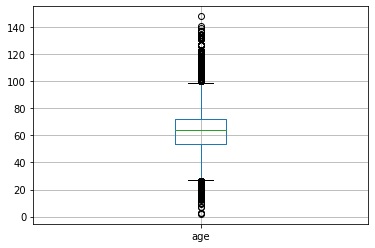

In [7]:
#Drawing boxplot for age
travel_search.boxplot(column=['age'], return_type='axes');

In [8]:
#Finding outliers such as age greater than 100 
travel_search[(travel_search['age'] >= 100)].count()

query              1087
clickthroughurl    1087
os                 1087
device             1087
date               1087
age                1087
gender             1058
dtype: int64

In [9]:
#Finding outliers such as age less than 3
travel_search[(travel_search['age'] <= 3)].count()

query              3
clickthroughurl    3
os                 3
device             3
date               3
age                3
gender             2
dtype: int64

In [10]:
#Cleaning the outliers
travel_search.drop(travel_search[travel_search['age']<= 3].index, inplace= True )
travel_search.drop(travel_search[travel_search['age']>= 100].index, inplace= True )

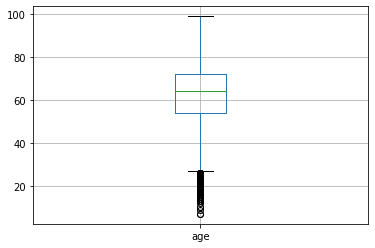

In [11]:
#Plotting the boxplot for age
travel_search.boxplot(column=['age'], return_type='axes');

In [12]:
#Structure of travel search
travel_search.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367479 entries, 0 to 368568
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   query            367479 non-null  object        
 1   clickthroughurl  367479 non-null  object        
 2   os               367479 non-null  object        
 3   device           367479 non-null  object        
 4   date             367479 non-null  datetime64[ns]
 5   age              340361 non-null  float64       
 6   gender           333062 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 22.4+ MB


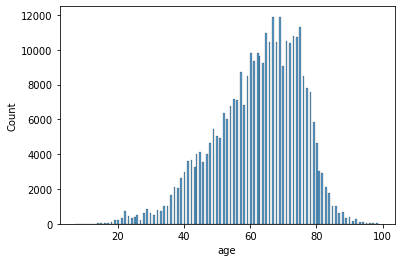

In [13]:
#Plotting histogram for travel searchers age 
sns.histplot(travel_search['age'])

In [14]:
#Copying the travel search data frame to ndf for further analysis
ndf = travel_search.copy(deep = True)

In [15]:
#Checking any columns with zero as entry
(ndf == 0).sum()

query              0
clickthroughurl    0
os                 0
device             0
date               0
age                0
gender             0
dtype: int64

In [16]:
#Checking the null values
ndf.isnull().sum()

query                  0
clickthroughurl        0
os                     0
device                 0
date                   0
age                27118
gender             34417
dtype: int64

In [17]:
#Imputimg the missing values
num = ['age','gender']
#Label encoding for gender
ndf[['gender']] = ndf[['gender']].apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    ))

imp_num = IterativeImputer(estimator=RandomForestClassifier(), 
                               initial_strategy='most_frequent',
                               imputation_order='descending',
                               max_iter=10, random_state=0)
ndf[num] = imp_num.fit_transform(ndf[num])

//anaconda3/lib/python3.7/site-packages/sklearn/impute/_base.py:356: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_mask = np.logical_not(row_mask).astype(np.bool)
//anaconda3/lib/python3.7/site-packages/sklearn/impute/_base.py:356: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_mask = np.logical_not(row_mask).astype(np.bool)
//anaconda3/lib/

In [18]:
#Verfying there is no null values
ndf.isnull().sum()

query              0
clickthroughurl    0
os                 0
device             0
date               0
age                0
gender             0
dtype: int64

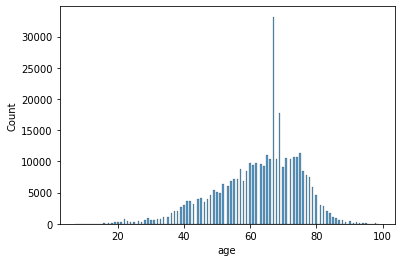

In [19]:
#Plotting the hitogram for age
sns.histplot(ndf['age'])

In [20]:
#Rpalcinng the label encoder with 1 and 0 
ndf["gender"].replace({1: "Male", 0: "Female"}, inplace=True)

In [21]:
#Creating a new csv for Data Visualistion in BI Tool
ndf.to_csv('travel_searches_imputed.csv')

In [22]:
#Reading the csv file for creating word cloud from query
ndf_new_wordcloud = pd.read_csv("travel_searches_imputed.csv",encoding ="UTF-8")
#Filtering dataframe with query and gender
ndf_query = ndf_new_wordcloud.filter(["query","gender"], axis=1)
ndf_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367479 entries, 0 to 367478
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   query   367479 non-null  object
 1   gender  367479 non-null  object
dtypes: object(2)
memory usage: 5.6+ MB


In [23]:
#Dispaying Information of first few auery and geneder 
ndf_query.head()

,query,gender
0,2022_bank_holidays,Male
1,ace_holiday_to_anglesey,Female
2,alfa_coach_holidays,Female
3,alfa_coach_holidays,Female
4,allinclusive_holidays_cape_verde,Male


In [24]:
#Creating a new dataframe for Male Searches
ndf_male_query = ndf_query[(ndf_query["gender"]=="Male")]
ndf_male_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214743 entries, 0 to 367476
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   query   214743 non-null  object
 1   gender  214743 non-null  object
dtypes: object(2)
memory usage: 4.9+ MB


In [25]:
#Creating a new dataframe for Female Searches
ndf_female_query = ndf_query[(ndf_query["gender"]=="Female")]
ndf_female_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152736 entries, 1 to 367478
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   query   152736 non-null  object
 1   gender  152736 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [26]:
#Function for creating wordcloud
def word_cloud_travelsearch(df):
    comment_words = ''
    stopwords = set(STOPWORDS)
    lemmatizer = WordNetLemmatizer()
 
    # iterate through the csv file
    for val in ndf_male_query['query']:
     
        # typecaste each val to string
        val = str(val)
        # Clean text
        val = re.sub(r'==.*?==+', '', val)
        val = val.replace('_', ' ')
        lemmatizer.lemmatize(val)
        # split the value
        tokens = val.split()
     
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

     
        comment_words += " ".join(tokens)+" "
    wc = WordCloud()
    #comment_words = comment_words.transpose().sort_values(ascending=False) 
    # create a dictionary of word frequencies
    text_dictionary = wc.process_text(comment_words)
    # sort the dictionary
    word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
    wordcloud_1 = WordCloud(width = 800, height = 800,max_words=1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate_from_frequencies(word_freq)
 
   
    return wordcloud_1

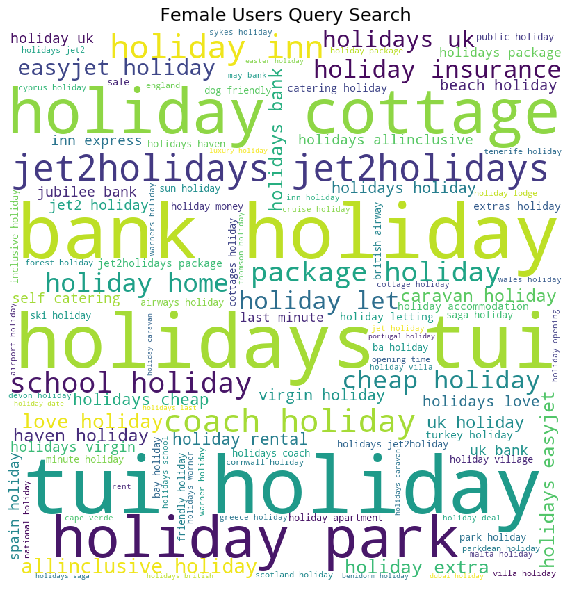

In [42]:
#Calling function for creating wordcloud for Female query searches 
wordcloud_female = word_cloud_travelsearch(ndf_female_query)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_female)
plt.axis("off")
plt.title("Female Users Query Search",size=18)
plt.tight_layout(pad = 0)
plt.savefig('female_wordcloud.png')
plt.show()

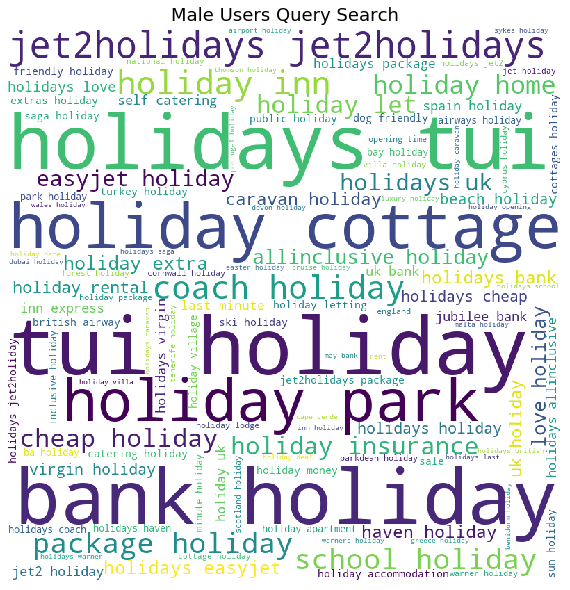

In [43]:
#Calling function for creating wordcloud for Male query searches 
wordcloud_male = word_cloud_travelsearch(ndf_male_query)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_male)
plt.axis("off")
plt.title("Male Users Query Search",size=18)
plt.tight_layout(pad = 0)
plt.savefig('male_wordcloud.png')
plt.show()

In [29]:
#Reading Travel Consumer Journey Data
travel_data_consumer = pd.read_csv("travel_consumer_journey.csv")

In [30]:
#Data structure of Travel Consumer Journey
travel_data_consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216009 entries, 0 to 216008
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       216009 non-null  object
 1   booking_dt    216009 non-null  int64 
 2   travel_dt     216009 non-null  int64 
 3   departure_ap  216009 non-null  object
 4   arrival_ap    216009 non-null  object
 5   no_days       216009 non-null  int64 
 6   category      216009 non-null  object
 7   activity_dt   216009 non-null  int64 
 8   gender        216009 non-null  object
 9   age           216009 non-null  object
dtypes: int64(4), object(6)
memory usage: 16.5+ MB


In [31]:
#Converting the datatype to date
travel_data_consumer["booking_dt"] = pd.to_datetime(travel_data_consumer["booking_dt"], format='%Y%m%d')
travel_data_consumer["travel_dt"] = pd.to_datetime(travel_data_consumer["travel_dt"], format='%Y%m%d')
travel_data_consumer["activity_dt"] = pd.to_datetime(travel_data_consumer["activity_dt"], format='%Y%m%d')
travel_data_consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216009 entries, 0 to 216008
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       216009 non-null  object        
 1   booking_dt    216009 non-null  datetime64[ns]
 2   travel_dt     216009 non-null  datetime64[ns]
 3   departure_ap  216009 non-null  object        
 4   arrival_ap    216009 non-null  object        
 5   no_days       216009 non-null  int64         
 6   category      216009 non-null  object        
 7   activity_dt   216009 non-null  datetime64[ns]
 8   gender        216009 non-null  object        
 9   age           216009 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 16.5+ MB


In [32]:
#Finding the missing values
travel_data_consumer.isnull().sum()

user_id         0
booking_dt      0
travel_dt       0
departure_ap    0
arrival_ap      0
no_days         0
category        0
activity_dt     0
gender          0
age             0
dtype: int64

In [33]:
#Finding unique users
travel_data_consumer['user_id'].nunique()

47563

In [ ]:
#Checking the number of unknown gender
travel_data_consumer[(travel_data_consumer['gender'] == 'unknown')].count()

In [34]:
#Checking the users stayed more than a year
travel_data_consumer[(travel_data_consumer['no_days'] >= 365)].count()

user_id         0
booking_dt      0
travel_dt       0
departure_ap    0
arrival_ap      0
no_days         0
category        0
activity_dt     0
gender          0
age             0
dtype: int64

In [37]:
#Finding any variables having zero as entry
(travel_data_consumer == 0).sum()

user_id         0
booking_dt      0
travel_dt       0
departure_ap    0
arrival_ap      0
no_days         0
category        0
activity_dt     0
gender          0
age             0
dtype: int64

In [38]:
#Finding the Departure Airport
travel_data_consumer['departure_ap'].unique()

array(['EDI', 'MAN', 'LGW', 'BHX', 'BFS', 'LHR', 'STN', 'LTN', 'EMA',
       'BRS', 'LPL', 'BOH', 'NCL', 'LBA', 'GLA', 'CWL', 'DSA', 'BHD',
       'ABZ', 'SOU', 'EXT'], dtype=object)

In [39]:
#Finding the Arrival Airport
travel_data_consumer['arrival_ap'].unique()

array(['RIX', 'WMI', 'ZYA', 'FNC', 'TFS', 'LRL', 'ZTH', 'OTP', 'ABV',
       'BZG', 'PSA', 'CPH', 'AGP', 'FAO', 'RBA', 'PMI', 'DXB', 'KUN',
       'KIV', 'DUB', 'TLV', 'BFS', 'DME', 'CGN', 'ALC', 'ACE', 'SZG',
       'CIA', 'OMR', 'PFO', 'BHX', 'DLM', 'GRO', 'VRN', 'LDY', 'MAH',
       'ZRH', 'BCM', 'PRG', 'VLC', 'PEG', 'VNO', 'AYT', 'IBZ', 'GOA',
       'JER', 'JFK', 'KSC', 'SBZ', 'HAM', 'MLA', 'IAS', 'LIS', 'LEI',
       'EFL', 'MXP', 'KTW', 'AMD', 'LOS', 'EDI', 'MAD', 'NTE', 'BCN',
       'VCE', 'NCS', 'CRA', 'FCO', 'EIN', 'LPA', 'ARN', 'POZ', 'PHL',
       'BOD', 'ATH', 'TIA', 'FUE', 'MIA', 'SUF', 'RZE', 'MRS', 'BTS',
       'LCA', 'CLJ', 'BER', 'SOF', 'INV', 'TLS', 'GDN', 'SUJ', 'BUD',
       'GVA', 'HRG', 'BJV', 'LCJ', 'SCV', 'RHO', 'APF', 'LAX', 'MBJ',
       'JNB', 'TSR', 'KRK', 'CAG', 'SKG', 'DWS', 'YYZ', 'BIQ', 'GLA',
       'LHR', 'BHD', 'MAN', 'STN', 'TPA', 'CAI', 'WAW', 'ORY', 'TSF',
       'STR', 'VIE', 'TRN', 'KGS', 'FKB', 'CTA', 'KIR', 'MJV', 'EGC',
       'SZZ', 'WRO',

In [40]:
#Creating updated csv file for data visualisation
travel_data_consumer.to_csv('travel_data_consumerjourney.csv')